# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [1]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/opt/anaconda3/lib/python3.11/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-
To: /Users/abd/Downloads/Bus_Breakdown_and_Delays.csv
100%|██████████████████████████████████████| 34.4M/34.4M [00:01<00:00, 19.6MB/s]


In [103]:
df = pd.read_csv('/Users/abd/Downloads/Bus_Breakdown_and_Delays.csv')

## Importing Libraries

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from keras.metrics import Precision, Recall
from sklearn.preprocessing import StandardScaler

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [104]:
df.info(), df.describe(), df.head() , df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

(None,
        Busbreakdown_ID  Number_Of_Students_On_The_Bus
 count     1.479720e+05                  147972.000000
 mean      1.287779e+06                       3.590071
 std       4.324338e+04                      55.365859
 min       1.212681e+06                       0.000000
 25%       1.250438e+06                       0.000000
 50%       1.287844e+06                       0.000000
 75%       1.325191e+06                       4.000000
 max       1.362605e+06                    9007.000000,
   School_Year  Busbreakdown_ID  Run_Type Bus_No Route_Number         Reason  \
 0   2015-2016          1224901  Pre-K/EI    811            1          Other   
 1   2015-2016          1225098  Pre-K/EI   9302            1  Heavy Traffic   
 2   2015-2016          1215800  Pre-K/EI    358            2  Heavy Traffic   
 3   2015-2016          1215511  Pre-K/EI    331            2          Other   
 4   2015-2016          1215828  Pre-K/EI    332            2          Other   
 
   Schools_Serv

In [105]:
df.columns

Index(['School_Year', 'Busbreakdown_ID', 'Run_Type', 'Bus_No', 'Route_Number',
       'Reason', 'Schools_Serviced', 'Occurred_On', 'Created_On', 'Boro',
       'Bus_Company_Name', 'How_Long_Delayed', 'Number_Of_Students_On_The_Bus',
       'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
       'Have_You_Alerted_OPT', 'Informed_On', 'Incident_Number',
       'Last_Updated_On', 'Breakdown_or_Running_Late', 'School_Age_or_PreK'],
      dtype='object')

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [106]:
df['Run_Type'].value_counts()

Run_Type
Special Ed AM Run          85990
Pre-K/EI                   20951
Special Ed PM Run          17672
General Ed AM Run          17182
General Ed PM Run           4541
Special Ed Field Trip        628
General Ed Field Trip        570
Project Read PM Run          300
Project Read AM Run           47
Project Read Field Trip        2
Name: count, dtype: int64

In [107]:
df['Run_Type'].mode()

0    Special Ed AM Run
Name: Run_Type, dtype: object

In [108]:
df['Run_Type'] = df['Run_Type'].fillna(df['Run_Type'].mode()[0])

In [109]:
df['Route_Number'].value_counts()

Route_Number
1         2569
2         2217
3         1904
5         1740
4         1093
          ... 
26Q7MD       1
M688         1
JC-1         1
W656         1
1409B        1
Name: count, Length: 11283, dtype: int64

In [110]:
df.dropna(subset=['Route_Number'], inplace=True)

In [111]:
df['Reason'].value_counts()

Reason
Heavy Traffic                  87372
Other                          21654
Mechanical Problem             13902
Won`t Start                     7270
Flat Tire                       4579
Weather Conditions              4527
Late return from Field Trip     3464
Problem Run                     2204
Delayed by School               1445
Accident                        1365
Name: count, dtype: int64

In [112]:
df['Reason'] = df['Reason'].fillna(df['Reason'].mode()[0])

In [113]:
df['Boro'].value_counts()

Boro
Bronx              40973
Brooklyn           35618
Manhattan          28658
Queens             21150
Staten Island       6920
Westchester         4529
Nassau County       1968
New Jersey           887
Rockland County      491
All Boroughs         275
Connecticut          102
Name: count, dtype: int64

In [114]:
df.dropna(subset=['Boro'], inplace=True)

In [115]:
df['How_Long_Delayed'].value_counts()

How_Long_Delayed
20 MINS       5640
30 MINS       4523
30 minutes    3647
15 mins       3421
30MINS        3157
              ... 
602 MIN          1
15 Mins.         1
15-30 Mins       1
ONE HOUR         1
45 MINIUTE       1
Name: count, Length: 1831, dtype: int64

In [116]:
df.dropna(subset=['How_Long_Delayed'], inplace=True)

In [117]:
df['Incident_Number'].value_counts()

Incident_Number
x           107
X            77
e            65
90276267     24
90278844     16
           ... 
90033161      1
90033126      1
90033160      1
90033165      1
90323827      1
Name: count, Length: 4090, dtype: int64

In [118]:
df = df.drop(['Incident_Number'], axis=1)

In [119]:
df = df.drop(['Busbreakdown_ID'], axis=1)

In [120]:
df = df.drop(['Bus_No'], axis=1)

In [121]:
df.isna().sum()

School_Year                        0
Run_Type                           0
Route_Number                       0
Reason                             0
Schools_Serviced                   0
Occurred_On                        0
Created_On                         0
Boro                               0
Bus_Company_Name                   0
How_Long_Delayed                   0
Number_Of_Students_On_The_Bus      0
Has_Contractor_Notified_Schools    0
Has_Contractor_Notified_Parents    0
Have_You_Alerted_OPT               0
Informed_On                        0
Last_Updated_On                    0
Breakdown_or_Running_Late          0
School_Age_or_PreK                 0
dtype: int64

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120710 entries, 0 to 147971
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      120710 non-null  object
 1   Run_Type                         120710 non-null  object
 2   Route_Number                     120710 non-null  object
 3   Reason                           120710 non-null  object
 4   Schools_Serviced                 120710 non-null  object
 5   Occurred_On                      120710 non-null  object
 6   Created_On                       120710 non-null  object
 7   Boro                             120710 non-null  object
 8   Bus_Company_Name                 120710 non-null  object
 9   How_Long_Delayed                 120710 non-null  object
 10  Number_Of_Students_On_The_Bus    120710 non-null  int64 
 11  Has_Contractor_Notified_Schools  120710 non-null  object
 12  Has_Contractor_Notifi

In [123]:
df['Bus_Company_Name'].value_counts()
df = df.drop(['Bus_Company_Name'], axis=1)

In [124]:
date_col = ['Last_Updated_On','Informed_On','Created_On','Occurred_On']
df = df.drop(date_col,axis=1)

In [125]:
df['Schools_Serviced'].value_counts()
df = df.drop(['Schools_Serviced'], axis=1)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120710 entries, 0 to 147971
Data columns (total 12 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      120710 non-null  object
 1   Run_Type                         120710 non-null  object
 2   Route_Number                     120710 non-null  object
 3   Reason                           120710 non-null  object
 4   Boro                             120710 non-null  object
 5   How_Long_Delayed                 120710 non-null  object
 6   Number_Of_Students_On_The_Bus    120710 non-null  int64 
 7   Has_Contractor_Notified_Schools  120710 non-null  object
 8   Has_Contractor_Notified_Parents  120710 non-null  object
 9   Have_You_Alerted_OPT             120710 non-null  object
 10  Breakdown_or_Running_Late        120710 non-null  object
 11  School_Age_or_PreK               120710 non-null  object
dtypes: int64(1), object(1

In [127]:

df['Route_Number'].value_counts()
df = df.drop(['Route_Number'], axis=1)

In [128]:
df['Reason'].value_counts()

Reason
Heavy Traffic                  80500
Other                          18106
Mechanical Problem              5721
Weather Conditions              4127
Late return from Field Trip     3240
Won`t Start                     2325
Flat Tire                       2221
Problem Run                     2111
Delayed by School               1274
Accident                        1085
Name: count, dtype: int64

In [129]:
df['How_Long_Delayed'].value_counts()
df = df.drop(['How_Long_Delayed'], axis=1)

In [130]:
df.head()

,School_Year,Run_Type,Reason,Boro,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,Pre-K/EI,Other,Bronx,5,Yes,Yes,No,Running Late,Pre-K
1,2015-2016,Pre-K/EI,Heavy Traffic,Bronx,3,Yes,Yes,No,Running Late,Pre-K
2,2015-2016,Pre-K/EI,Heavy Traffic,Bronx,12,Yes,Yes,Yes,Running Late,Pre-K
3,2015-2016,Pre-K/EI,Other,Bronx,11,Yes,Yes,Yes,Running Late,Pre-K
4,2015-2016,Pre-K/EI,Other,Bronx,12,Yes,Yes,No,Running Late,Pre-K


In [131]:
categorical_cols = ['School_Year','Run_Type','Reason','Boro','Has_Contractor_Notified_Schools','Has_Contractor_Notified_Parents','Have_You_Alerted_OPT','School_Age_or_PreK']

In [132]:

ohe_encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = ohe_encoder.fit_transform(df[categorical_cols])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=ohe_encoder.get_feature_names_out(categorical_cols))

df_encoded = pd.concat([df, one_hot_df], axis=1)


df_encoded = df_encoded.drop(categorical_cols, axis=1)

df = df_encoded

In [133]:

target_balance = df_encoded['Breakdown_or_Running_Late'].value_counts()

df_encoded['Breakdown_or_Running_Late'] = df_encoded['Breakdown_or_Running_Late'].apply(lambda x: 1 if x == 'Running Late' else 0)

df_encoded.head(), target_balance

(   Number_Of_Students_On_The_Bus  Breakdown_or_Running_Late  \
 0                            5.0                          1   
 1                            3.0                          1   
 2                           12.0                          1   
 3                           11.0                          1   
 4                           12.0                          1   
 
    School_Year_2015-2016  School_Year_2016-2017  School_Year_2017-2018  \
 0                    1.0                    0.0                    0.0   
 1                    1.0                    0.0                    0.0   
 2                    1.0                    0.0                    0.0   
 3                    1.0                    0.0                    0.0   
 4                    1.0                    0.0                    0.0   
 
    Run_Type_General Ed AM Run  Run_Type_General Ed Field Trip  \
 0                         0.0                             0.0   
 1                         0.0

In [134]:
df['Breakdown_or_Running_Late'].value_counts()

Breakdown_or_Running_Late
1    120699
0     22293
Name: count, dtype: int64

In [135]:
df.isna().sum()

Number_Of_Students_On_The_Bus          22282
Breakdown_or_Running_Late                  0
School_Year_2015-2016                  22282
School_Year_2016-2017                  22282
School_Year_2017-2018                  22282
Run_Type_General Ed AM Run             22282
Run_Type_General Ed Field Trip         22282
Run_Type_General Ed PM Run             22282
Run_Type_Pre-K/EI                      22282
Run_Type_Project Read AM Run           22282
Run_Type_Project Read Field Trip       22282
Run_Type_Project Read PM Run           22282
Run_Type_Special Ed AM Run             22282
Run_Type_Special Ed Field Trip         22282
Run_Type_Special Ed PM Run             22282
Reason_Accident                        22282
Reason_Delayed by School               22282
Reason_Flat Tire                       22282
Reason_Heavy Traffic                   22282
Reason_Late return from Field Trip     22282
Reason_Mechanical Problem              22282
Reason_Other                           22282
Reason_Pro

In [136]:
df.columns

Index(['Number_Of_Students_On_The_Bus', 'Breakdown_or_Running_Late',
       'School_Year_2015-2016', 'School_Year_2016-2017',
       'School_Year_2017-2018', 'Run_Type_General Ed AM Run',
       'Run_Type_General Ed Field Trip', 'Run_Type_General Ed PM Run',
       'Run_Type_Pre-K/EI', 'Run_Type_Project Read AM Run',
       'Run_Type_Project Read Field Trip', 'Run_Type_Project Read PM Run',
       'Run_Type_Special Ed AM Run', 'Run_Type_Special Ed Field Trip',
       'Run_Type_Special Ed PM Run', 'Reason_Accident',
       'Reason_Delayed by School', 'Reason_Flat Tire', 'Reason_Heavy Traffic',
       'Reason_Late return from Field Trip', 'Reason_Mechanical Problem',
       'Reason_Other', 'Reason_Problem Run', 'Reason_Weather Conditions',
       'Reason_Won`t Start', 'Boro_All Boroughs', 'Boro_Bronx',
       'Boro_Brooklyn', 'Boro_Connecticut', 'Boro_Manhattan',
       'Boro_Nassau County', 'Boro_New Jersey', 'Boro_Queens',
       'Boro_Rockland County', 'Boro_Staten Island', 'Boro_West

In [137]:
nan_value_drop = ['Number_Of_Students_On_The_Bus', 'Breakdown_or_Running_Late',
       'School_Year_2015-2016', 'School_Year_2016-2017',
       'School_Year_2017-2018', 'Run_Type_General Ed AM Run',
       'Run_Type_General Ed Field Trip', 'Run_Type_General Ed PM Run',
       'Run_Type_Pre-K/EI', 'Run_Type_Project Read AM Run',
       'Run_Type_Project Read Field Trip', 'Run_Type_Project Read PM Run',
       'Run_Type_Special Ed AM Run', 'Run_Type_Special Ed Field Trip',
       'Run_Type_Special Ed PM Run', 'Reason_Accident',
       'Reason_Delayed by School', 'Reason_Flat Tire', 'Reason_Heavy Traffic',
       'Reason_Late return from Field Trip', 'Reason_Mechanical Problem',
       'Reason_Other', 'Reason_Problem Run', 'Reason_Weather Conditions',
       'Reason_Won`t Start', 'Boro_All Boroughs', 'Boro_Bronx',
       'Boro_Brooklyn', 'Boro_Connecticut', 'Boro_Manhattan',
       'Boro_Nassau County', 'Boro_New Jersey', 'Boro_Queens',
       'Boro_Rockland County', 'Boro_Staten Island', 'Boro_Westchester',
       'Has_Contractor_Notified_Schools_No',
       'Has_Contractor_Notified_Schools_Yes',
       'Has_Contractor_Notified_Parents_No',
       'Has_Contractor_Notified_Parents_Yes', 'Have_You_Alerted_OPT_No',
       'Have_You_Alerted_OPT_Yes', 'School_Age_or_PreK_Pre-K',
       'School_Age_or_PreK_School-Age']
df.dropna(subset=nan_value_drop, inplace=True)

In [138]:
df.isna().sum()

Number_Of_Students_On_The_Bus          0
Breakdown_or_Running_Late              0
School_Year_2015-2016                  0
School_Year_2016-2017                  0
School_Year_2017-2018                  0
Run_Type_General Ed AM Run             0
Run_Type_General Ed Field Trip         0
Run_Type_General Ed PM Run             0
Run_Type_Pre-K/EI                      0
Run_Type_Project Read AM Run           0
Run_Type_Project Read Field Trip       0
Run_Type_Project Read PM Run           0
Run_Type_Special Ed AM Run             0
Run_Type_Special Ed Field Trip         0
Run_Type_Special Ed PM Run             0
Reason_Accident                        0
Reason_Delayed by School               0
Reason_Flat Tire                       0
Reason_Heavy Traffic                   0
Reason_Late return from Field Trip     0
Reason_Mechanical Problem              0
Reason_Other                           0
Reason_Problem Run                     0
Reason_Weather Conditions              0
Reason_Won`t Sta

In [139]:
df['Breakdown_or_Running_Late'].value_counts()

Breakdown_or_Running_Late
1    98417
0       11
Name: count, dtype: int64

In [140]:
from imblearn.over_sampling import SMOTE

X = df_encoded.drop(columns=['Breakdown_or_Running_Late'])
y = df_encoded['Breakdown_or_Running_Late']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

new_class_balance = y_resampled.value_counts()
new_class_balance

Breakdown_or_Running_Late
1    98417
0    98417
Name: count, dtype: int64

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [142]:
model = Sequential()
model.add(Dense(units=6, input_dim=X_train.shape[1], kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [143]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355 (1.39 KB)

 Trainable params: 355 (1.39 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the ANN model using the training data.

In [144]:
history = model.fit(X_train, y_train, batch_size=10, epochs=50, validation_split=0.2)

Epoch 1/50
12598/12598 ━━━━━━━━━━━━━━━━━━━━ 6s 399us/step - accuracy: 0.9225 - loss: 0.2332 - precision: 0.9387 - recall: 0.9143 - val_accuracy: 0.9782 - val_loss: 0.0624 - val_precision: 0.9905 - val_recall: 0.9658
Epoch 2/50
12598/12598 ━━━━━━━━━━━━━━━━━━━━ 5s 390us/step - accuracy: 0.9809 - loss: 0.0602 - precision: 0.9935 - recall: 0.9683 - val_accuracy: 0.9840 - val_loss: 0.0525 - val_precision: 0.9917 - val_recall: 0.9763
Epoch 3/50
12598/12598 ━━━━━━━━━━━━━━━━━━━━ 5s 395us/step - accuracy: 0.9830 - loss: 0.0519 - precision: 0.9915 - recall: 0.9742 - val_accuracy: 0.9878 - val_loss: 0.0455 - val_precision: 0.9927 - val_recall: 0.9830
Epoch 4/50
12598/12598 ━━━━━━━━━━━━━━━━━━━━ 5s 387us/step - accuracy: 0.9847 - loss: 0.0477 - precision: 0.9919 - recall: 0.9774 - val_accuracy: 0.9790 - val_loss: 0.0582 - val_precision: 0.9810 - val_recall: 0.9771
Epoch 5/50
12598/12598 ━━━━━━━━━━━━━━━━━━━━ 5s 396us/step - accuracy: 0.9850 - loss: 0.0464 - precision: 0.9922 - recall: 0.9778 - val_a

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [145]:
model.evaluate(X_test, y_test)

1231/1231 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - accuracy: 0.9852 - loss: 0.0318 - precision: 0.9921 - recall: 0.9779


[0.03014235384762287,
 0.9860035181045532,
 0.993320882320404,
 0.9784770607948303]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [146]:
model.predict(X_test)

1231/1231 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step


array([[0.03829711],
       [1.        ],
       [0.00580744],
       ...,
       [1.        ],
       [0.39645705],
       [1.        ]], dtype=float32)

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

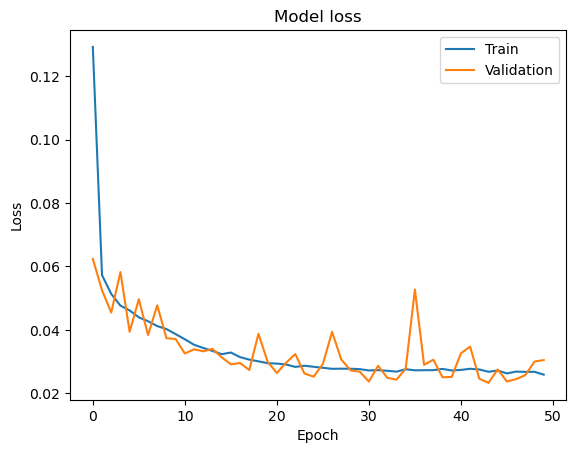

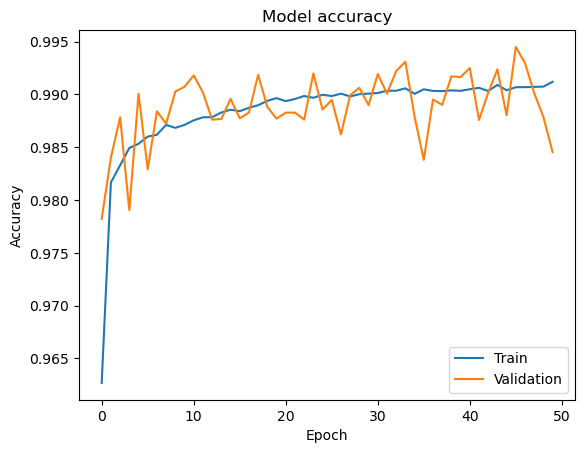

In [147]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

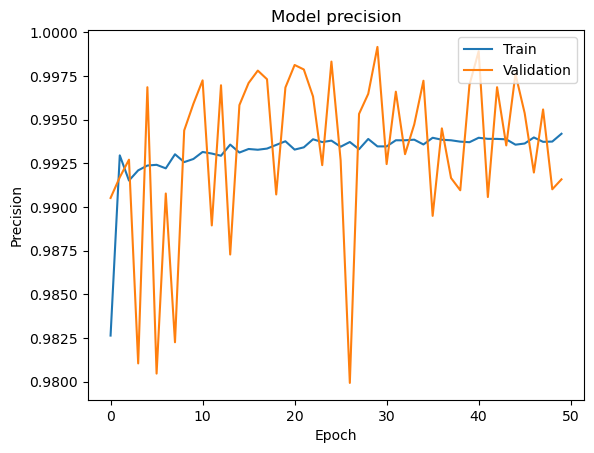

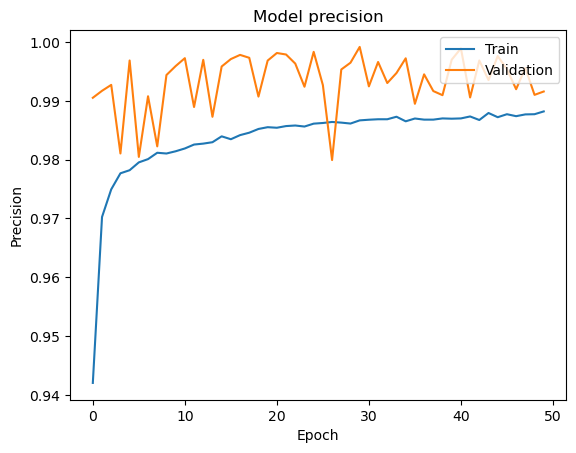

In [150]:
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('Model precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


plt.plot(history.history['recall'])
plt.plot(history.history['val_precision'])
plt.title('Model precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## Save the Model
Save the trained model for submission.

In [149]:
model.save('Abd_ANN_model.h5')
model.save('Abd_ANN_model.keras')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

1- i usually try to find which columns effect the Target , in this case if we want to see if its running late or break down , dates or when its happened doesnt matter for example , bus number or ID doesnt effect it as well , cleaning the data , encoding , balancing the data took the most time of this practice.

2- 4 denses first input , 2 hidden lyers , and 1 output with sigmoid function , result will be in bainary 0,1 as we see in the compile.

3-batch size and epoch usually i choose them with this (Tottal Feature / dense size)

4- test was 20% from the data and validation was 20% from the training data , we classified the data if its running late class or breakdown class